# Exploring Amazon Grocery Market Dynamics: ML, DL, Unsupervised Insights, and Generative AI Content Generation

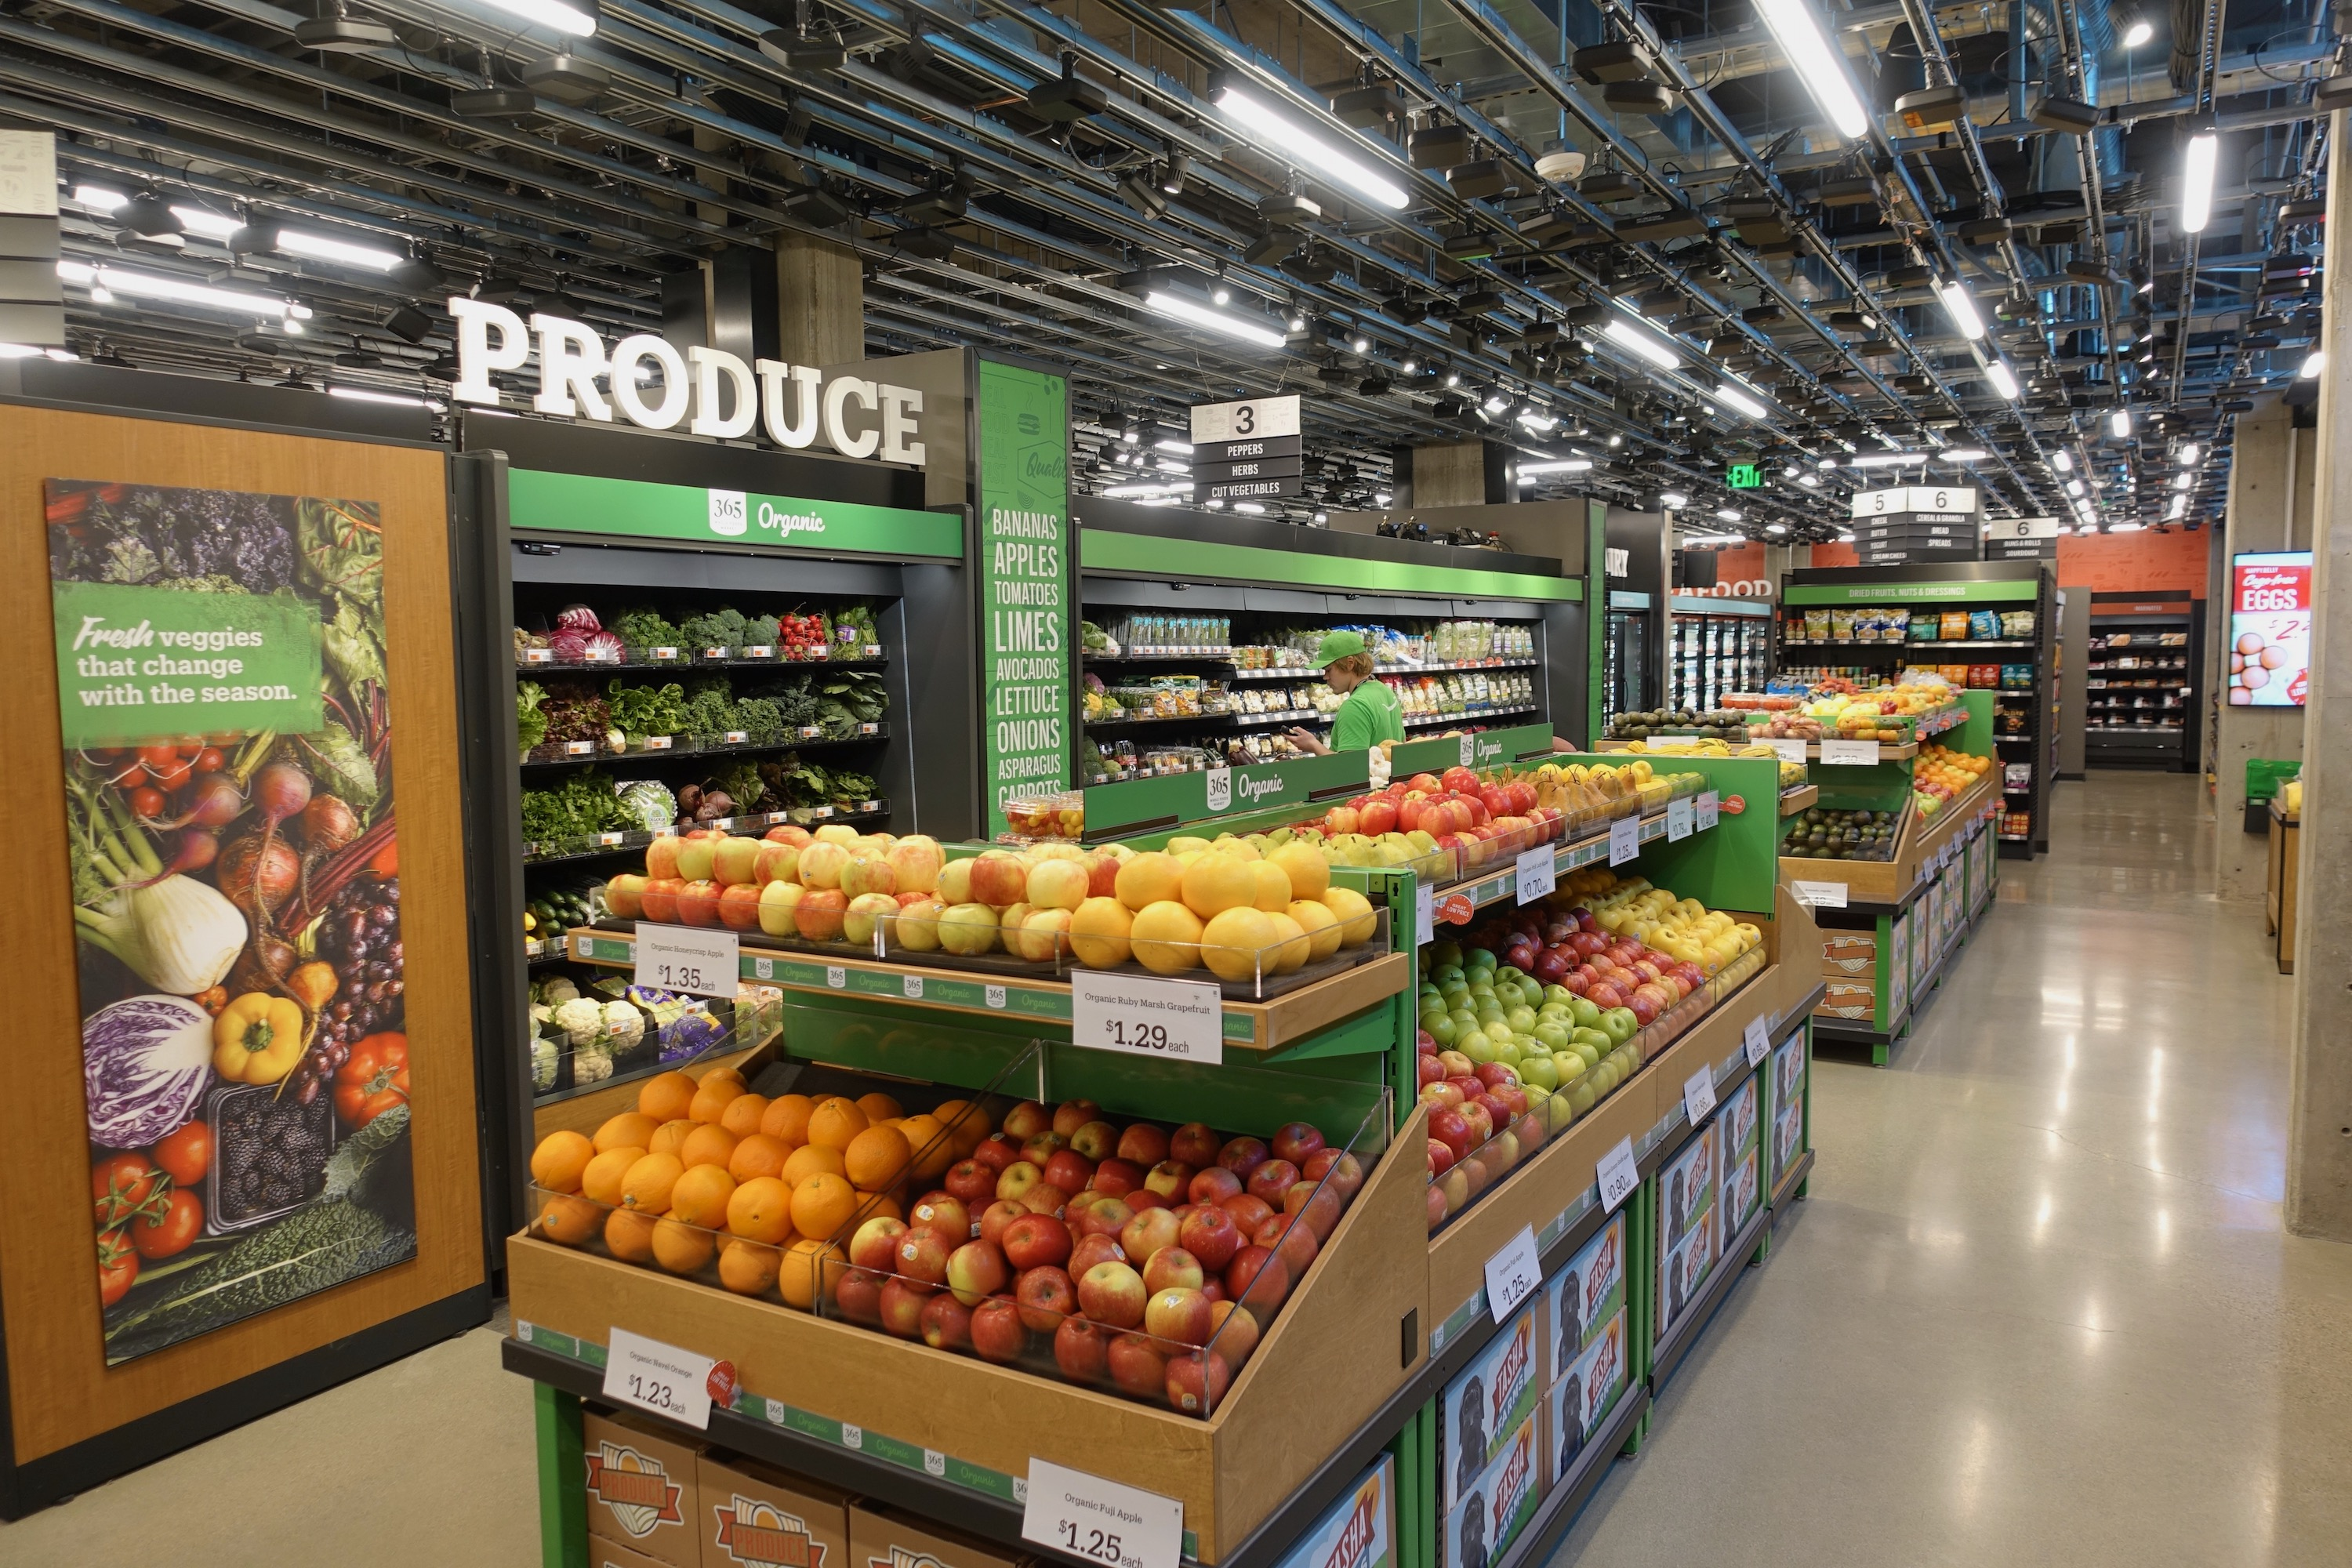

# Importing Necessary Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px # is a high-level interface for creating various types of interactive plots with minimal code. 
import plotly.graph_objects as go # is a lower-level interface that offers more control and customization over the appearance and behavior of your plots

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [3]:
df = pd.read_csv("amazon_grocery.csv")

# Exploratory Data Analysis

In [4]:
df.head()

Unnamed: 0                                    Product Details        ASIN  \
0           0  Lindt Lindor Milk Chocolate Truffles Box - The...  B00NW479QO   
1           1  Andrex Toilet Roll - Gentle Clean Toilet Paper...  B004OCO20E   
2           2            Baileys Original Irish Cream Liqueur 1L  B0049NYI7K   
3           3  Tassimo Kenco Americano Grande Coffee Pods (Pa...  B016DEGFWI   
4           4  Tassimo Costa Gingerbread Latte Coffee Pods (P...  B07JVF2FCV   

     Brand  Price    Sales   Revenue  BSR  FBA Fees  Active Sellers #  ...  \
0    Lindt   3.50  13466.0   47131.0  3.0      2.62              30.0  ...   
1   Andrex  18.28  13338.0  243819.0  2.0      8.38              30.0  ...   
2  BAILEYS   9.99  11194.0  111828.0  4.0      3.93              22.0  ...   
3  Tassimo  14.87  13492.0  200626.0  2.0      5.19              11.0  ...   
4  Tassimo  45.00  13377.0  601965.0  6.0     11.03               1.0  ...   

   Review Count  Images  Review velocity      Buy Box              Category  \
0       44069.0    12.0            868.0       Amazon         Food Cupboard   
1       40397.0     5.0            830.0       Amazon               Grocery   
2        3827.0     6.0            235.0       Amazon  Beer, Wine & Spirits   
3       28800.0     5.0            466.0       Amazon       Fresh & Chilled   
4       27494.0     9.0            223.0  Bountyville                Drinks   

        Size Tier Delivery      Dimensions Weight  Creation Date  
0  Small Oversize      AMZ     4.2x6.3x3.1   0.51      9/26/2014  
1  Large Oversize      AMZ  13.5x21.8x13.0   9.77      2/17/2011  
2  Large Oversize      AMZ    3.7x12.2x3.7   3.73     10/21/2010  
3  Large Oversize      AMZ    6.8x15.5x6.2   3.26     08-04-2010  
4  Large Oversize      FBA    6.7x15.4x6.1   4.74     09-03-2018  

[5 rows x 21 columns]

In [5]:
df.tail()

Unnamed: 0                                    Product Details  \
6336        6336  García de la Cruz - Organic Extra Virgin Olive...   
6337        6337  Tree of Life Organic Apple Cider Vinegar with ...   
6338        6338  Kentish Oils Extra Virgin Rapeseed Oil Gift Se...   
6339        6339           Biona Organic Apple Cider Vinegar, 500ml   
6340        6340  Sonnoveld Cake Release Spray Cooking Oil Bakin...   

            ASIN                   Brand  Price  Sales  Revenue     BSR  \
6336  B089H2CBKP  García DE LA cruz 1872  17.50  162.0   2835.0  6418.0   
6337  B075WX3V4F            Tree of Life   4.84  931.0   4506.0  7297.0   
6338  B011A1FZJI     Kent Crisps Limited  13.93  122.0   1699.0  6486.0   
6339  B0013GAEII                   Biona   2.85  208.0    593.0  7443.0   
6340  B08G874BS3               Sonneveld  13.99  310.0   4337.0  6679.0   

      FBA Fees  Active Sellers #  ...  Review Count  Images  Review velocity  \
6336      6.82               1.0  ...         530.0     4.0              2.0   
6337      2.89               1.0  ...         562.0     6.0             15.0   
6338      6.27               1.0  ...         228.0     1.0              1.0   
6339      2.73               7.0  ...         260.0     7.0              0.0   
6340      4.74               1.0  ...         117.0     7.0              9.0   

                Buy Box       Category       Size Tier Delivery  \
6336  García de la Cruz  Food Cupboard  Large Oversize      FBA   
6337             Amazon  Food Cupboard  Large Oversize      AMZ   
6338             Amazon  Food Cupboard  Large Oversize      AMZ   
6339             Amazon  Food Cupboard  Large Oversize      AMZ   
6340      Comfort_Care2  Food Cupboard  Large Oversize      FBA   

         Dimensions Weight  Creation Date  
6336   6.2x11.4x5.5   4.23      7/16/2020  
6337    4.4x9.5x3.4   1.68      9/24/2017  
6338  11.3x14.2x2.8   5.03     07-01-2015  
6339   3.5x10.7x3.5   1.81     02-02-2008  
6340   2.8x12.4x2.8   1.28      8/19/2020  

[5 rows x 21 columns]

In [6]:
df.shape

(6341, 21)

In [7]:
df.columns

Index(['Unnamed: 0', 'Product Details', 'ASIN', 'Brand', 'Price', 'Sales',
       'Revenue', 'BSR', 'FBA Fees', 'Active Sellers #', 'Ratings',
       'Review Count', 'Images', 'Review velocity', 'Buy Box', 'Category',
       'Size Tier', 'Delivery', 'Dimensions', 'Weight', 'Creation Date'],
      dtype='object')

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

Unnamed: 0             0
Product Details        0
ASIN                   0
Brand                 17
Price               1264
Sales               1802
Revenue             1511
BSR                  453
FBA Fees            2636
Active Sellers #      51
Ratings              828
Review Count         828
Images               492
Review velocity       50
Buy Box             1932
Category               0
Size Tier           1529
Delivery            1089
Dimensions          1516
Weight              1437
Creation Date          1
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6341 entries, 0 to 6340
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        6341 non-null   int64  
 1   Product Details   6341 non-null   object 
 2   ASIN              6341 non-null   object 
 3   Brand             6324 non-null   object 
 4   Price             5077 non-null   float64
 5   Sales             4539 non-null   float64
 6   Revenue           4830 non-null   float64
 7   BSR               5888 non-null   float64
 8   FBA Fees          3705 non-null   float64
 9   Active Sellers #  6290 non-null   float64
 10  Ratings           5513 non-null   float64
 11  Review Count      5513 non-null   float64
 12  Images            5849 non-null   float64
 13  Review velocity   6291 non-null   float64
 14  Buy Box           4409 non-null   object 
 15  Category          6341 non-null   object 
 16  Size Tier         4812 non-null   object 


In [11]:
df.describe()

Unnamed: 0        Price         Sales        Revenue           BSR  \
count  6341.00000  5077.000000   4539.000000    4830.000000  5.888000e+03   
mean   3170.00000    15.205212    982.762503   11330.371843  9.781002e+04   
std    1830.63336    12.576685   2430.146523   37115.305071  1.971163e+05   
min       0.00000     0.500000      0.000000       0.000000  0.000000e+00   
25%    1585.00000     7.100000     11.000000      72.000000  5.037000e+03   
50%    3170.00000    12.840000     91.000000     823.500000  4.037600e+04   
75%    4755.00000    20.000000    552.000000    5412.500000  1.364030e+05   
max    6340.00000   254.990000  23288.000000  601965.000000  4.405945e+06   

          FBA Fees  Active Sellers #      Ratings  Review Count       Images  \
count  3705.000000       6290.000000  5513.000000   5513.000000  5849.000000   
mean      5.397206          3.617965     4.589516    870.420461     4.666268   
std       3.521769          7.290586     0.604482   3014.611763     2.913145   
min       0.000000          1.000000     1.000000      1.000000     1.000000   
25%       3.060000          1.000000     4.000000     10.000000     2.000000   
50%       4.780000          1.000000     5.000000     93.000000     5.000000   
75%       7.150000          3.000000     5.000000    458.000000     7.000000   
max     137.000000        135.000000     5.000000  66998.000000    25.000000   

       Review velocity       Weight  
count      6291.000000  4904.000000  
mean         21.152917     5.204541  
std         249.247799    14.598992  
min       -3680.000000     0.010000  
25%           0.000000     0.750000  
50%           0.000000     1.960000  
75%           5.000000     5.040000  
max        9132.000000   881.850000

# Data Cleaning and Preprocessing

In [12]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [13]:
df.duplicated().sum()

1250

In [14]:
df = df.drop_duplicates()

In [15]:
column_name_mapping = {
    'Product Details': 'product_details',
    'ASIN': 'asin',
    'Brand': 'brand',
    'Price': 'price',
    'Sales': 'sales',
    'Revenue': 'revenue',
    'BSR': 'best_seller_rank',
    'FBA Fees': 'fba_fees',
    'Active Sellers #': 'active_sellers',
    'Ratings': 'ratings',
    'Review Count': 'review_count',
    'Images': 'images',
    'Review velocity': 'review_velocity',
    'Buy Box': 'buy_box',
    'Category': 'category',
    'Size Tier': 'size_tier',
    'Delivery': 'delivery',
    'Dimensions': 'dimensions',
    'Weight': 'weight',
    'Creation Date': 'creation_date'
}

df = df.rename(columns=column_name_mapping)

In [16]:
object_columns = df.select_dtypes(include='object').columns.tolist()
numerical_columns = df.select_dtypes(include=['int', 'float']).columns.tolist()

print("Object columns:", object_columns)
print('\n')
print("Numerical columns:", numerical_columns)

Object columns: ['product_details', 'asin', 'brand', 'buy_box', 'category', 'size_tier', 'delivery', 'dimensions', 'creation_date']


Numerical columns: ['price', 'sales', 'revenue', 'best_seller_rank', 'fba_fees', 'active_sellers', 'ratings', 'review_count', 'images', 'review_velocity', 'weight']


In [17]:
def identify_numeric_type(df, column_name):
    unique_values_count = len(df[column_name].unique())
    if unique_values_count < 10:
        return 'Discrete'
    else:
        return 'Continuous'

In [18]:
for column_name in numerical_columns:
    numeric_type = identify_numeric_type(df, column_name)
    print(f'The numerical column "{column_name}" is {numeric_type}.')

The numerical column "price" is Continuous.
The numerical column "sales" is Continuous.
The numerical column "revenue" is Continuous.
The numerical column "best_seller_rank" is Continuous.
The numerical column "fba_fees" is Continuous.
The numerical column "active_sellers" is Continuous.
The numerical column "ratings" is Discrete.
The numerical column "review_count" is Continuous.
The numerical column "images" is Continuous.
The numerical column "review_velocity" is Continuous.
The numerical column "weight" is Continuous.


In [19]:
continuous_columns = ['price', 'sales', 'revenue', 'best_seller_rank', 'fba_fees', 'active_sellers',
                      'review_count', 'images', 'review_velocity', 'weight']
discrete_columns = ['ratings']

In [20]:
for col in continuous_columns:
    df[col].fillna(df[col].mean(), inplace=True)

In [21]:
for col in discrete_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

For each column (col), it calculates the mode (most frequent value) of that column using the mode() function. The mode function returns a DataFrame containing the mode(s) for each column. Since we're interested in the most frequent value (assuming there is only one mode), we use [0] to select the first mode.

In [22]:
for col in object_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [23]:
df.isnull().sum()

product_details     0
asin                0
brand               0
price               0
sales               0
revenue             0
best_seller_rank    0
fba_fees            0
active_sellers      0
ratings             0
review_count        0
images              0
review_velocity     0
buy_box             0
category            0
size_tier           0
delivery            0
dimensions          0
weight              0
creation_date       0
dtype: int64

In [24]:
df.nunique()

product_details     5049
asin                5071
brand               1565
price               1333
sales               1120
revenue             2095
best_seller_rank    4510
fba_fees             791
active_sellers        59
ratings                5
review_count        1183
images                19
review_velocity      244
buy_box              746
category              23
size_tier              7
delivery               3
dimensions          3419
weight               892
creation_date       1907
dtype: int64

In [25]:
def identify_object_categorical_type(df, column_name):
    unique_values_count = len(df[column_name].unique())
    if unique_values_count < 10:
        return 'Categorical'
    else:
        return 'Non Categorical'

In [26]:
for column_name in object_columns:
    category_type = identify_object_categorical_type(df, column_name)
    print(f'The categorical column "{column_name}" is {category_type}.')

The categorical column "product_details" is Non Categorical.
The categorical column "asin" is Non Categorical.
The categorical column "brand" is Non Categorical.
The categorical column "buy_box" is Non Categorical.
The categorical column "category" is Non Categorical.
The categorical column "size_tier" is Categorical.
The categorical column "delivery" is Categorical.
The categorical column "dimensions" is Non Categorical.
The categorical column "creation_date" is Non Categorical.


In [27]:
categorical_columns = ['size_tier','delivery']
non_categorical_columns = ['product_details','asin','brand','buy_box','category','dimensions',
                           'creation_date']

In [28]:
for i in categorical_columns:
    print(i)
    print(df[i].unique())
    print('\n')

size_tier
['Small Oversize' 'Large Oversize' 'Standard Parcel' 'Large Envelope'
 'Small Envelope' 'Standard Envelope' 'Large Letter']


delivery
['AMZ' 'FBA' 'MFN']




In [29]:
for i in categorical_columns:
    print(i)
    print(df[i].value_counts())
    print('\n')

size_tier
Large Oversize       4397
Small Oversize        418
Standard Parcel       237
Large Envelope         22
Standard Envelope       9
Large Letter            5
Small Envelope          3
Name: size_tier, dtype: int64


delivery
MFN    2739
AMZ    1224
FBA    1128
Name: delivery, dtype: int64




# Data Visualization

Clustering Analysis: You probably applied clustering algorithms like K-means or hierarchical clustering to group similar products or customers based on certain features like price, ratings, or sales.

Dimensionality Reduction: Techniques like Principal Component Analysis (PCA) might have been used to reduce the dimensionality of your feature space. This helps in visualizing and analyzing the data in a lower-dimensional space.

In [31]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

KMeans is an unsupervised learning algorithm used for clustering tasks. It partitions the dataset into 'k' distinct, non-overlapping subsets (or clusters).
In the code, we use KMeans to cluster the data based on the specified features (in this case, 'price' and 'sales').
StandardScaler from sklearn.preprocessing:

StandardScaler is a preprocessing step used to standardize features by removing the mean and scaling to unit variance.
It's important to scale features before applying clustering algorithms to ensure that each feature contributes equally to the computation of distances.

In [32]:
# Select and preprocess data
X = df[continuous_columns].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [33]:
# Determine the optimal number of clusters using the Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

inertia:

inertia is an empty list that will store the sum of squared distances of samples to their closest cluster center for each number of clusters.
Loop for Cluster Numbers 1 to 10:

The loop runs from 1 to 10 (inclusive). For each iteration, it performs the following steps:
KMeans Initialization: Initialize the KMeans clustering algorithm with the current number of clusters (ranging from 1 to 10) and a random state for reproducibility.
kmeans.fit(X_scaled): Fit the KMeans model to the scaled dataset (X_scaled), which is the preprocessed data using StandardScaler.
kmeans.inertia_: Compute and store the sum of squared distances (inertia) of samples to their closest cluster center for the current number of clusters. This is a measure of how compact the clusters are.
The resulting inertia list will contain the sum of squared distances for each number of clusters (from 1 to 10).

The Elbow Method involves plotting these inertia values against the number of clusters and identifying the "elbow" point where the inertia starts to decrease at a slower rate. This "elbow" point often represents the optimal number of clusters for the dataset.

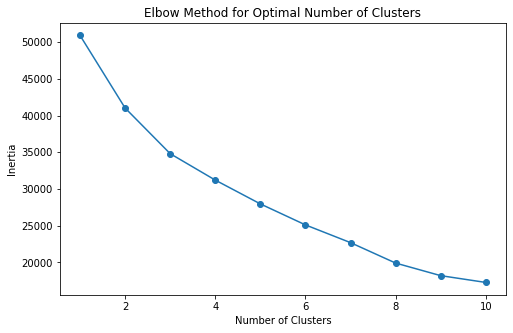

In [34]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

In [50]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(1, 11)), y=inertia, mode='markers+lines', marker=dict(symbol='circle', size=10),
                         line=dict(color='blue', width=2)))
fig.update_layout(title='Elbow Method for Optimal Number of Clusters',
                  xaxis=dict(title='Number of Clusters'),
                  yaxis=dict(title='Inertia'))
fig.show()

In [35]:
optimal_clusters = 4  # Adjust based on the Elbow Method plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

In [36]:
df

product_details        asin  \
0     Lindt Lindor Milk Chocolate Truffles Box - The...  B00NW479QO   
1     Andrex Toilet Roll - Gentle Clean Toilet Paper...  B004OCO20E   
2               Baileys Original Irish Cream Liqueur 1L  B0049NYI7K   
3     Tassimo Kenco Americano Grande Coffee Pods (Pa...  B016DEGFWI   
4     Tassimo Costa Gingerbread Latte Coffee Pods (P...  B07JVF2FCV   
...                                                 ...         ...   
6336  García de la Cruz - Organic Extra Virgin Olive...  B089H2CBKP   
6337  Tree of Life Organic Apple Cider Vinegar with ...  B075WX3V4F   
6338  Kentish Oils Extra Virgin Rapeseed Oil Gift Se...  B011A1FZJI   
6339           Biona Organic Apple Cider Vinegar, 500ml  B0013GAEII   
6340  Sonnoveld Cake Release Spray Cooking Oil Bakin...  B08G874BS3   

                       brand  price    sales   revenue  best_seller_rank  \
0                      Lindt   3.50  13466.0   47131.0               3.0   
1                     Andrex  18.28  13338.0  243819.0               2.0   
2                    BAILEYS   9.99  11194.0  111828.0               4.0   
3                    Tassimo  14.87  13492.0  200626.0               2.0   
4                    Tassimo  45.00  13377.0  601965.0               6.0   
...                      ...    ...      ...       ...               ...   
6336  García DE LA cruz 1872  17.50    162.0    2835.0            6418.0   
6337            Tree of Life   4.84    931.0    4506.0            7297.0   
6338     Kent Crisps Limited  13.93    122.0    1699.0            6486.0   
6339                   Biona   2.85    208.0     593.0            7443.0   
6340               Sonneveld  13.99    310.0    4337.0            6679.0   

      fba_fees  active_sellers  ratings  ...  images  review_velocity  \
0         2.62            30.0      5.0  ...    12.0            868.0   
1         8.38            30.0      5.0  ...     5.0            830.0   
2         3.93            22.0      5.0  ...     6.0            235.0   
3         5.19            11.0      5.0  ...     5.0            466.0   
4        11.03             1.0      5.0  ...     9.0            223.0   
...        ...             ...      ...  ...     ...              ...   
6336      6.82             1.0      5.0  ...     4.0              2.0   
6337      2.89             1.0      5.0  ...     6.0             15.0   
6338      6.27             1.0      5.0  ...     1.0              1.0   
6339      2.73             7.0      4.0  ...     7.0              0.0   
6340      4.74             1.0      5.0  ...     7.0              9.0   

                buy_box              category       size_tier delivery  \
0                Amazon         Food Cupboard  Small Oversize      AMZ   
1                Amazon               Grocery  Large Oversize      AMZ   
2                Amazon  Beer, Wine & Spirits  Large Oversize      AMZ   
3                Amazon       Fresh & Chilled  Large Oversize      AMZ   
4           Bountyville                Drinks  Large Oversize      FBA   
...                 ...                   ...             ...      ...   
6336  García de la Cruz         Food Cupboard  Large Oversize      FBA   
6337             Amazon         Food Cupboard  Large Oversize      AMZ   
6338             Amazon         Food Cupboard  Large Oversize      AMZ   
6339             Amazon         Food Cupboard  Large Oversize      AMZ   
6340      Comfort_Care2         Food Cupboard  Large Oversize      FBA   

          dimensions weight  creation_date cluster  
0        4.2x6.3x3.1   0.51      9/26/2014       3  
1     13.5x21.8x13.0   9.77      2/17/2011       3  
2       3.7x12.2x3.7   3.73     10/21/2010       3  
3       6.8x15.5x6.2   3.26     08-04-2010       3  
4       6.7x15.4x6.1   4.74     09-03-2018       3  
...              ...    ...            ...     ...  
6336    6.2x11.4x5.5   4.23      7/16/2020       2  
6337     4.4x9.5x3.4   1.68      9/24/2017       0  
6338   11.3x14.2x2.8   5.03    

In [37]:
from sklearn.decomposition import PCA

PCA, or Principal Component Analysis, is a dimensionality reduction technique commonly used in machine learning and data analysis. It's used to transform a high-dimensional dataset into a lower-dimensional space while retaining as much of the original data's variance as possible. This reduction in dimensionality is valuable for various reasons, including visualization, noise reduction, and improving the performance of machine learning models.

Here's a more detailed explanation of the steps and purpose of PCA:

1. **Standardization**: Before applying PCA, it's common to standardize the dataset, ensuring each feature has a mean of 0 and a standard deviation of 1. This step is essential to give each feature equal importance during the PCA process.

2. **Covariance Matrix Calculation**: The next step involves calculating the covariance matrix for the standardized dataset. The covariance matrix provides information about how the features vary with one another.

3. **Eigenvector and Eigenvalue Computation**: From the covariance matrix, we compute the eigenvectors and eigenvalues. Eigenvectors represent the directions of maximum variance (the principal components), and eigenvalues indicate the magnitude of the variance in each direction.

4. **Sort Eigenvectors by Eigenvalues**: We sort the eigenvectors based on their corresponding eigenvalues in decreasing order. This order reflects the amount of variance captured by each principal component.

5. **Select Principal Components**: We select a subset of the sorted eigenvectors (principal components) based on the desired number of dimensions (or percentage of variance to retain). Typically, we choose the top 'k' eigenvectors that correspond to the 'k' largest eigenvalues.

6. **Project Data onto Lower-Dimensional Space**: We use the selected eigenvectors to transform the original data onto the new lower-dimensional subspace.

PCA has several applications:

- **Dimensionality Reduction**: PCA helps reduce the number of features while retaining most of the information, simplifying the dataset.

- **Visualization**: It can be used to visualize high-dimensional data in a lower-dimensional space (e.g., 2D or 3D), aiding in data interpretation.

- **Noise Reduction**: By focusing on the principal components that capture the most variance, PCA can filter out noise in the data.

- **Preprocessing**: PCA can be used as a preprocessing step to improve the performance of machine learning models.

In [44]:
# Use PCA for dimensionality reduction
pca = PCA(n_components=3)  # You can choose a different number of components
X_pca = pca.fit_transform(X_scaled)

In [45]:
# Create a new DataFrame for the reduced features
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3'])

In [46]:
# Concatenate the cluster information to the PCA DataFrame
pca_df['cluster'] = df['cluster']

In [47]:
pca_df

PC1       PC2       PC3  cluster
0     15.321608  0.445129  1.167047      3.0
1     17.098240  3.725379  3.376818      3.0
2      6.713804  0.422049  0.175267      3.0
3     13.191253  1.999679  2.993112      3.0
4     18.963311  6.499735  5.102780      3.0
...         ...       ...       ...      ...
5086  -0.498500  0.338806 -0.239128      2.0
5087   0.144659 -1.128971 -0.693403      2.0
5088  -0.753728  0.126858  0.195716      2.0
5089   0.149269 -1.277097 -1.232127      0.0
5090  -0.184195 -0.427248 -0.776699      2.0

[5091 rows x 4 columns]

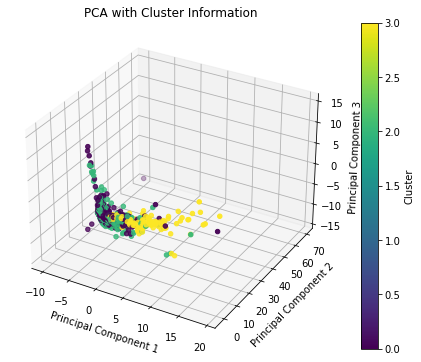

In [49]:
# Scatter plot for the first three principal components
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=pca_df['cluster'], cmap='viridis')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA with Cluster Information')
fig.colorbar(scatter, ax=ax, label='Cluster')
plt.show()

To find the features (original variables) that contribute the most to each principal component in PCA, you can examine the loadings of each feature on each principal component. The loadings are the coefficients that express the relationship between the original features and the principal components. Features with higher absolute loadings on a particular principal component contribute more to that component's definition.

The steps to find the most influential features for each principal component:

1. **Perform PCA**: First, you need to perform PCA on your dataset, which involves calculating the covariance matrix, finding eigenvalues and eigenvectors, and sorting them.

2. **Inspect Eigenvectors (Principal Components)**: Each eigenvector (principal component) represents a linear combination of the original features. These eigenvectors can be represented as an array of coefficients, where each coefficient corresponds to a feature. The magnitude and sign of these coefficients indicate the strength and direction of the relationship between the original features and the principal component.

3. **Sort Features by Loadings**: For each principal component, sort the original features (variables) based on the absolute values of their corresponding coefficients in the eigenvector. Features with the highest absolute coefficients contribute the most to that principal component.

In [51]:
# Initialize PCA with the desired number of components
n_components = 3  # Replace with the number of components you want
pca = PCA(n_components=n_components)

# Fit PCA to your data
pca.fit(X)  # X is your data matrix

PCA(n_components=3)

In [52]:
# Get the principal components (eigenvectors)
components = pca.components_

In [53]:
components

array([[ 6.43689615e-07, -6.00253502e-04, -1.27955038e-02,
         9.99917360e-01,  4.44732179e-07, -5.15438058e-06,
        -1.08914439e-03, -1.73804134e-06, -4.77904203e-05,
        -8.55085445e-07],
       [ 3.84771018e-05,  4.89483243e-02,  9.97421318e-01,
         1.28484256e-02,  4.56348532e-06,  6.00613490e-05,
         5.08654988e-02,  1.46568948e-05,  1.54562362e-03,
        -5.55412376e-06],
       [-7.27014313e-04,  3.11993859e-01, -6.36809752e-02,
         4.05804522e-04, -1.38095405e-04,  6.09248875e-04,
         9.47563253e-01,  1.21024645e-04,  2.69685830e-02,
        -2.09760998e-04]])

In [55]:
feature_names = ['price', 'sales', 'revenue', 'best_seller_rank', 'fba_fees', 'active_sellers',
                      'review_count', 'images', 'review_velocity', 'weight']

In [56]:
# Loop through each principal component to find the influential features
for i, pc in enumerate(components):
    # Sort the indices of features based on the absolute value of coefficients
    sorted_indices = sorted(range(len(pc)), key=lambda x: abs(pc[x]), reverse=True)
    
    # Get the names of the influential features
    influential_features = [feature_names[index] for index in sorted_indices]
    
    print(f"Principal Component {i + 1}:")
    print(influential_features)
    print()

Principal Component 1:
['best_seller_rank', 'revenue', 'review_count', 'sales', 'review_velocity', 'active_sellers', 'images', 'weight', 'price', 'fba_fees']

Principal Component 2:
['revenue', 'review_count', 'sales', 'best_seller_rank', 'review_velocity', 'active_sellers', 'price', 'images', 'weight', 'fba_fees']

Principal Component 3:
['review_count', 'sales', 'revenue', 'review_velocity', 'price', 'active_sellers', 'best_seller_rank', 'weight', 'fba_fees', 'images']

